# Homework 2

Visualize, describe, and model distributions

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

Here are some of the functions from Chapter 5.

In [2]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [3]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, label=label)

Read the GSS data again.

In [4]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 17 ms, sys: 43.3 ms, total: 60.3 ms
Wall time: 136 ms


(62466, 101)

In [5]:
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,0,0,2,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30,2,0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,0,0,7,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18,1,6,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22,2,3,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [6]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

### Distribution of age

Here's the CDF of ages.

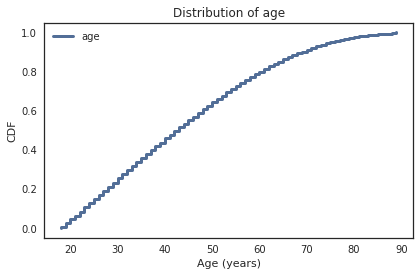

In [7]:
cdf_age = Cdf(gss.age)
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

**Exercise**:  Each of the following cells shows the distribution of ages under various transforms, compared to various models.  In each text cell, add a sentence or two that interprets the result.  What can we say about the distribution of ages based on each figure?

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

Interpretation: Based on the transformation, I can say that the normal distribution is not a great fit because it does not completely fit the sigmoid shape. The bottom of the graph goes straight down instead of having an asymptote at 0.

n, mean, std 62281 44.4790536887 16.4820374857


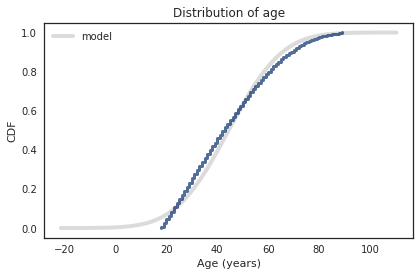

In [8]:
MakeNormalModel(gss.age.dropna(), label='')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

2) Here's a normal probability plot for the distribution of ages.

Interpretation: This proves that the normal distribution is a bad description of the data because it does not fit the straight line of the probability plot.

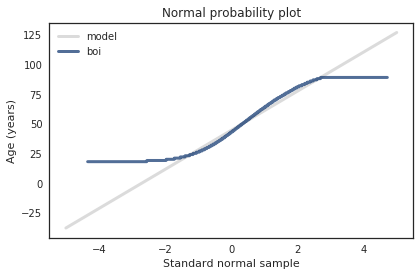

In [9]:
MakeNormalPlot(gss.age.dropna(), label='boi')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Age (years)')

3) Here's the complementary CDF on a log-y scale.

Interpretation: The distribtion of heights could not be exponential. If it was, the graph would like a straight line.

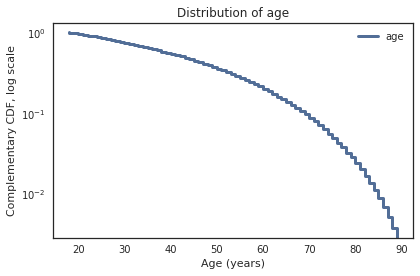

In [10]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF of ages on a log-x scale.

Interpretation: From this graph I can only assume that the data does not fit a lognormal distribution because it does not look like the graph is a sigmoid

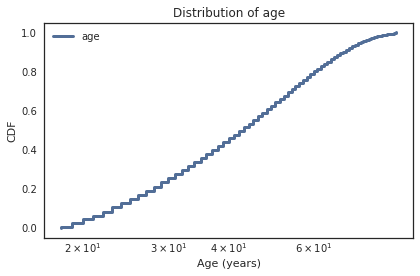

In [11]:
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of ages, compared to a normal model.

Interpretation: The distribution of heights is closer to lognormal because the graph is slightly curved at both ends making it closer to the sigmoid shape that it needs to be in order for the distribution to fit

n, mean, std 62281 1.61687441575 0.167879143289


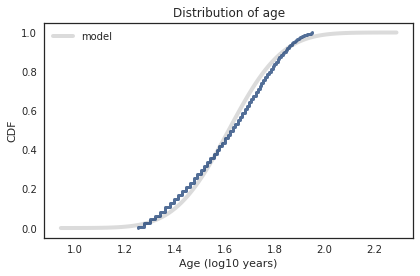

In [12]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of age', 
         xlabel='Age (log10 years)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of ages.

Interpretation: From this graph we can assume that the lognormal distribution is very skewed from the actual graph at the low and high values, which is because the graph is not a straight line

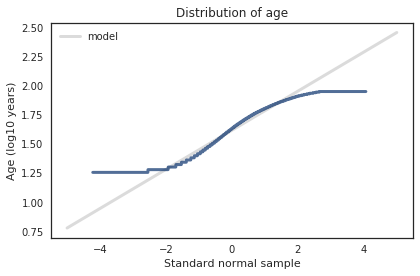

In [13]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

7) Here's the complementary CDF on a log-log scale.

Interpretation: This graph shows that the pareto distribution does not fit the data because the graph would be straight if it was a good fit.

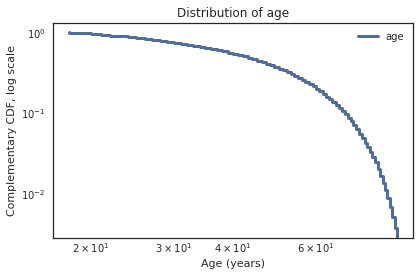

In [14]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether ages are well-modeled by a Weibull distribution.

Interpretation: The distribution shows that this is also a bad fit because it is not a straight line.

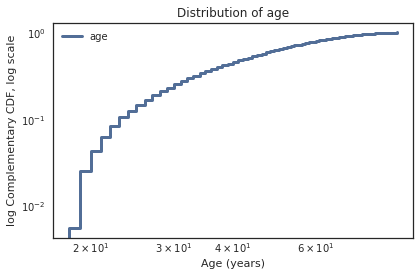

In [15]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

### Distribution of income

Here's the CDF of `realinc`.

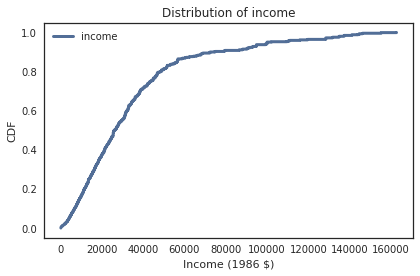

In [16]:
cdf_realinc = Cdf(gss.realinc)
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

**Exercise:** Use visualizations like the ones in the previous exercise to see whether there is an analytic model that describes the distribution of `gss.realinc` well.

n, mean, std 55499 33882.5218131 28502.895121


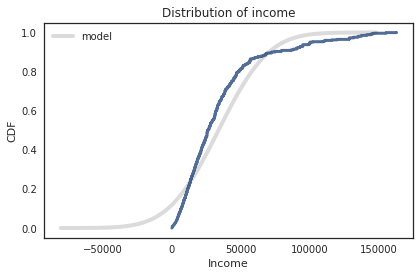

In [17]:
MakeNormalModel(gss.realinc.dropna(), label='')

decorate(title='Distribution of income', 
         xlabel='Income', 
         ylabel='CDF')

2) Here's a normal probability plot for the values.

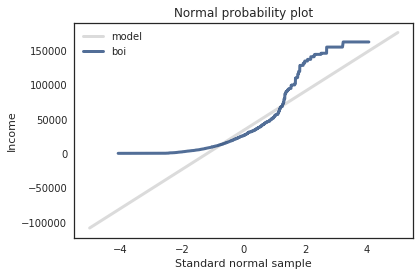

In [18]:
MakeNormalPlot(gss.realinc.dropna(), label='boi')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Income')

3) Here's the complementary CDF on a log-y scale.

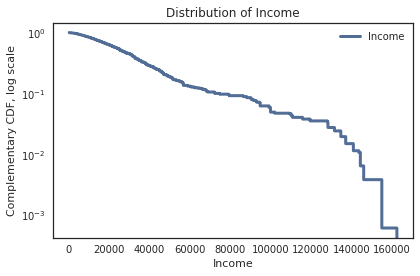

In [19]:
thinkplot.cdf(cdf_realinc, label='Income', complement=True)

decorate(title='Distribution of Income', 
         xlabel='Income', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF on a log-x scale.

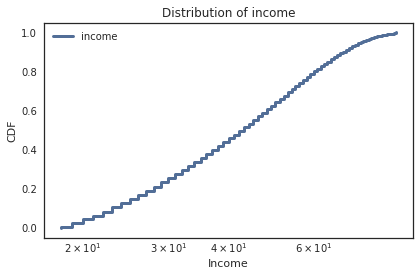

In [20]:
thinkplot.cdf(cdf_age, label='income')

decorate(title='Distribution of income', 
         xlabel='Income', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of the values, compared to a normal model.

n, mean, std 55499 4.38103173651 0.385660027321


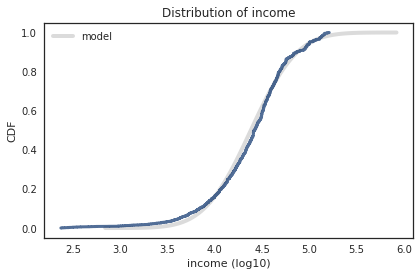

In [21]:
values = np.log10(gss.realinc.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of income', 
         xlabel='income (log10)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of the values.

Interpretation: In my opinion the lognormal distribution is the best description of the data. There is a some lack of accuracy shown in the probability plot towards the higher values and much of the lower values, but the other graphs do not fit the data as well.

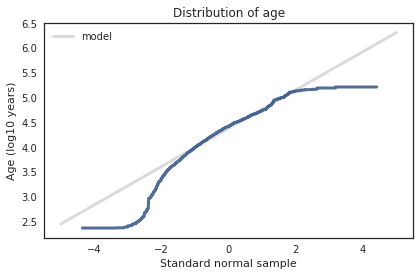

In [22]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

7) Here's the complementary CDF on a log-log scale.

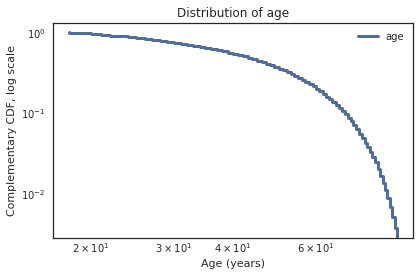

In [23]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether the values are well-modeled by a Weibull distribution.

Interpretation:

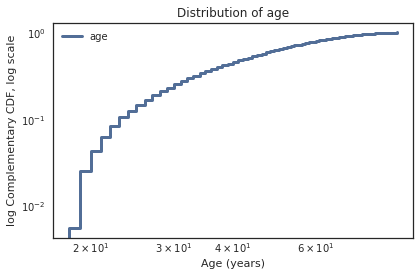

In [24]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

## BRFSS


In [25]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 18.6 ms


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0


Let's look at the distribution of height in the BRFSS dataset.  Here's the CDF.

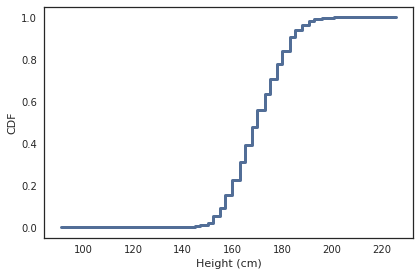

In [26]:
heights = brfss.HTM4

cdf_heights = Cdf(heights)
thinkplot.Cdf(cdf_heights)

decorate(xlabel='Height (cm)', ylabel='CDF')

To see whether a normal model describes this data well, we can use KDE to estimate the PDF.

In [27]:
from scipy.stats import gaussian_kde

Here's an example using the default bandwidth method.

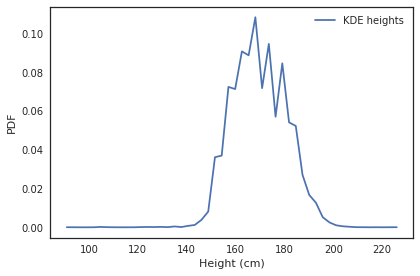

In [28]:
kde = gaussian_kde(heights.dropna())

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

It doesn't work very well; we can improve it by overriding the bandwidth with a constant.

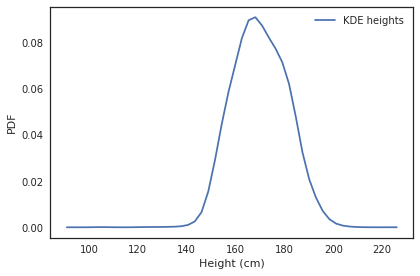

In [29]:
kde = gaussian_kde(heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

Now we can generate a normal model with the same mean and standard deviation.

In [30]:
mean = heights.mean()
std = heights.std()

mean, std

(170.09044280714292, 10.795080237191394)

Here's the model compared to the estimated PDF.

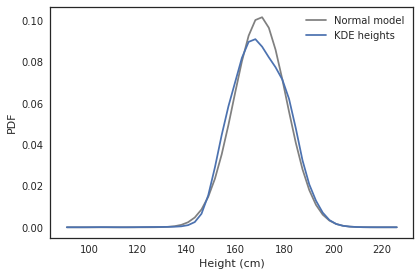

In [31]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data don't fit the model particularly well, possibly because the distribution of heights is a mixture of two distributions, for men and women.

**Exercise:** Generate a similar figure for just women's heights and see if the normal model does any better.

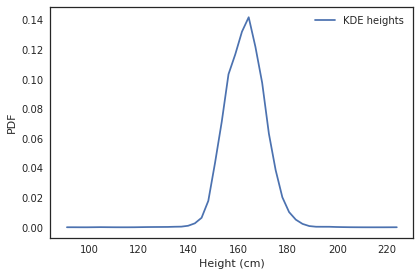

In [32]:
heightsw = brfss[brfss.SEX==2.0].HTM4

kde = gaussian_kde(heightsw.dropna(), bw_method=0.3)

xs = np.linspace(heightsw.min(), heightsw.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

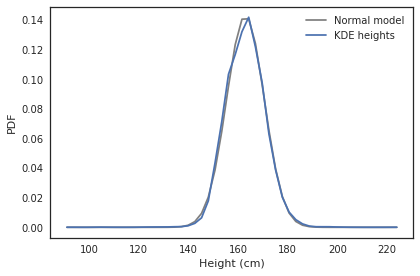

In [33]:
mean = heightsw.mean()
std = heightsw.std()

mean, std

normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data for women's heights works better with the normal distribution then the heights of all people

**Exercise:** Generate a similar figure for men's weights, `brfss.WTKG3`.  How well does the normal model fit?

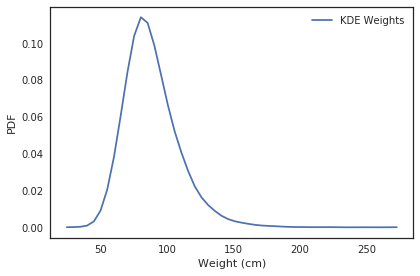

In [34]:
weightsm = brfss[brfss.SEX==1.0].WTKG3

kde = gaussian_kde(weightsm.dropna(), bw_method=0.3)

xs = np.linspace(weightsm.min(), weightsm.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE Weights')

decorate(xlabel='Weight (cm)', ylabel='PDF')

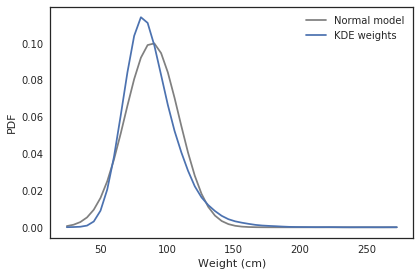

In [35]:
mean = weightsm.mean()
std = weightsm.std()

mean, std

normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE weights')

decorate(xlabel='Weight (cm)', ylabel='PDF')

The graph of men's weights does not fit he normal distribution curve very well. The curve higher than the model and does not have the same slope at the correct times

**Exercise:** Try it one more time with the log of men's weights.  How well does the normal model fit?  What does that imply about the distribution of weight?

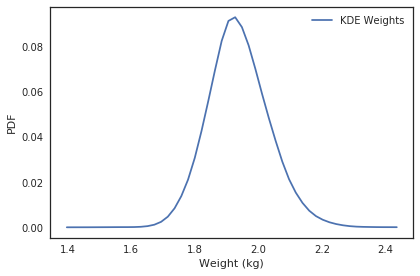

In [36]:
weightsm = brfss[brfss.SEX==1.0].WTKG3

loh = np.log10(weightsm.dropna())

kde = gaussian_kde(loh, bw_method=0.3)

xs = np.linspace(loh.min(), loh.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE Weights')

decorate(xlabel='Weight (kg)', ylabel='PDF')

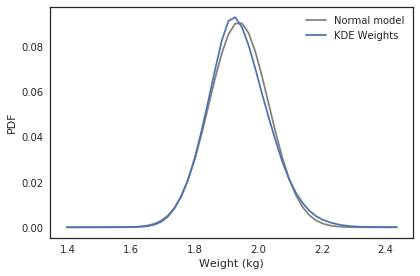

In [37]:
mean = loh.mean()
std = loh.std()

normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE Weights')

decorate(xlabel='Weight (kg)', ylabel='PDF')

The lognormal distribution is the best descriptor of the data because the data's kde fits the model the best

## Skewness

Let's look at the skewness of the distribution of weights for men and women.

In [38]:
male = (brfss.SEX == 1)
male_weights = brfss.loc[male, 'WTKG3']

In [39]:
female = (brfss.SEX == 2)
female_weights = brfss.loc[female, 'WTKG3']

As we've seen, these distributions are skewed to the right, so we expect the mean to be higher than the median. 

In [40]:
male_weights.mean(), male_weights.median()

(88.83871202341662, 86.18)

We can compute the moment-based sample skewness using Pandas or `thinkstats2`.  The results are almost the same.

In [41]:
male_weights.skew(), thinkstats2.Skewness(male_weights.dropna())

(1.2607915291363547, 1.2607508370740947)

But moment-based sample skewness is a terrible statistic!  A more robust alternative is Pearson's median skewness:

In [42]:
thinkstats2.PearsonMedianSkewness(male_weights.dropna())

0.39613561575325329

**Exercise:** Compute the same statistics for women.  Which distribution is more skewed?

In [43]:
female_weights.mean(), female_weights.median()

(73.6243871435631, 70.31)

In [44]:
female_weights.skew(), thinkstats2.Skewness(female_weights.dropna())

(1.3693028811523575, 1.3692590742841042)

In [45]:
thinkstats2.PearsonMedianSkewness(female_weights.dropna())

0.52684150567054056

The females data can be seen to be more skewed to the right than the male's data because the pearson median skewness is higher for the females than the males. Also the difference between mean and median is more positive than the same differnce for men

**Exercise:** Explore the GSS or BRFSS dataset and find something interesting!

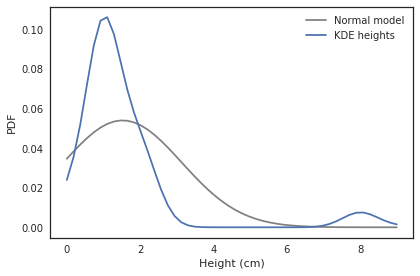

In [46]:
collioli = gss[gss.natcrime==1.0].cappun

kde = gaussian_kde(collioli.dropna(), bw_method=0.3)

xs = np.linspace(collioli.min(), collioli.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

mean = collioli.mean()
std = collioli.std()

mean, std

normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

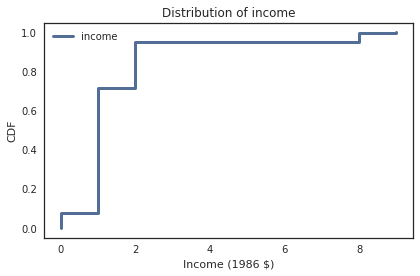

In [47]:
cdf_col = Cdf(collioli.dropna())
thinkplot.cdf(cdf_col, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

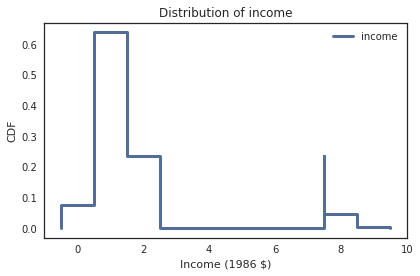

In [48]:
pmf_col = Pmf(collioli.dropna())
thinkplot.pmf(pmf_col, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

n, mean, std 23243 1.46639448615 1.46503244831


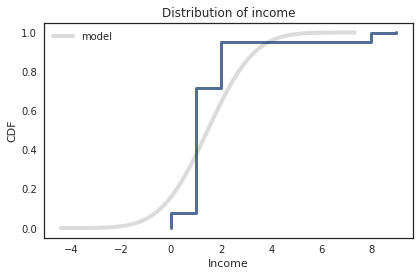

In [49]:
MakeNormalModel(collioli.dropna(), label='')

decorate(title='Distribution of income', 
         xlabel='Income', 
         ylabel='CDF')

In [52]:
MakeNormalPlot(cdf_col, label='boi')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Income')

KeyboardInterrupt: 

For my final question I wanted to see the association between people who do not believe enough money is being spent on law enforcement and people who believe in the death penalty. I found that the cdf and the pdf were not very effective indicators for my question. I attempted to see how well the data fit a normal distributio, but the data within this specific subset was so discretized that the cdf would only produce a step function, which means that the graph could not be accurately described normally. I also attempted to see if it fit a lognormal distribution, but trying to do the kde with these values would cause an error. From the pmf of the data, I observed that most people who believe that policing requires more money, also believe in the death penalty.
